# Organising Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing data

df = pd.read_csv("Brain_stroke.csv")

In [3]:
# number or rows and columns

df.shape

(43400, 12)

In [4]:
# printing first 5 rows

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
# finding the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
# checking the statistical data for numerical column

df[['id','age','avg_glucose_level','bmi']].describe()

,id,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,43400.000000,41938.000000
mean,36326.142350,42.217894,104.482750,28.605038
std,21072.134879,22.519649,43.111751,7.770020
min,1.000000,0.080000,55.000000,10.100000
25%,18038.500000,24.000000,77.540000,23.200000
50%,36351.500000,44.000000,91.580000,27.700000
75%,54514.250000,60.000000,112.070000,32.900000
max,72943.000000,82.000000,291.050000,97.600000


In [7]:
# checking the value count for categorical column

selected_df = df[['smoking_status','gender','ever_married','work_type','Residence_type','stroke']]
for column in selected_df.columns:
    print(selected_df[column].value_counts())

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64
gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64
ever_married
Yes    27938
No     15462
Name: count, dtype: int64
work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64
Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64
stroke
0    42617
1      783
Name: count, dtype: int64


# Cleaning Data

In [8]:
df_cleaned = df.drop('id', axis = 1)

In [9]:
# renaming the headers

df_cleaned = df_cleaned.rename({'gender': 'Gender',
                 'age': 'Age',
                 'hypertension': 'Hypertension',
                 'heart_disease': 'Heart Disease',
                 'ever_married': 'Married',
                 'work_type': 'Occupation',
                 'Residence_type': 'Residence',
                 'avg_glucose_level': 'Average Glucose level',
                 'bmi': 'BMI',
                 'smoking_status': 'Smoking',
                 'stroke': 'Brain Stroke'}, axis='columns')

In [10]:
# printing first 5 rows in renamed data

df_cleaned.head()

,Gender,Age,Hypertension,Heart Disease,Married,Occupation,Residence,Average Glucose level,BMI,Smoking,Brain Stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [11]:
# finding NA's

df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [12]:
# solving NA's in smoking column

df_cleaned['Smoking'] = df_cleaned['Smoking'].fillna('Unknown')

<Axes: xlabel='BMI'>

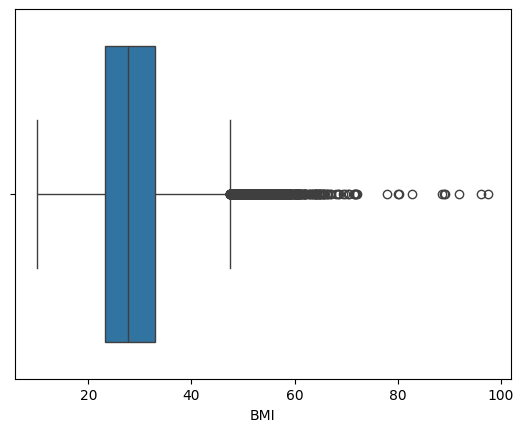

In [13]:
# outlier in BMI

sns.boxplot(x = 'BMI', data = df_cleaned)

In [14]:
# remove the rows for the age less then 5

df_cleaned = df_cleaned[df_cleaned['Age'] >= 6]

In [15]:
# imputing BMI values with the mean grouped by age group

def categorize_age(age):
    if age < 15:
        return 'child'
    elif 15 <= age < 30:
        return 'Young Adult'
    elif 30 <= age < 45:
        return 'Middle-Adult-aged'
    elif 45 <= age < 60:
        return 'Senior-aged'
    else:
        return 'Old-age'

df_cleaned = df_cleaned.copy()
df_cleaned.loc[:, 'Age Group'] = df_cleaned['Age'].apply(categorize_age)

In [16]:
df_cleaned = df_cleaned.copy()
df_cleaned.loc[:,'BMI'] = df_cleaned['BMI'].fillna(df_cleaned.groupby('Age Group')['BMI'].transform('mean'))

<Axes: xlabel='Age'>

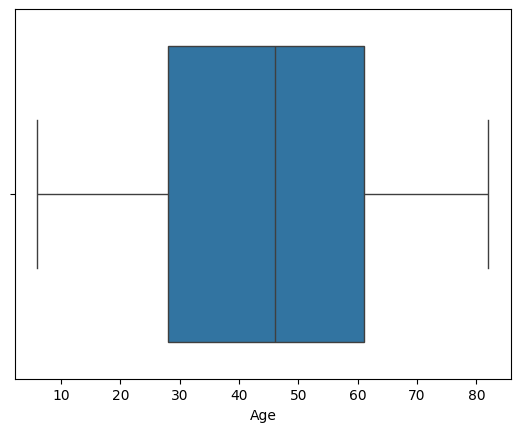

In [17]:
# outlier in Age

sns.boxplot(x = 'Age', data = df_cleaned)

<Axes: xlabel='Average Glucose level'>

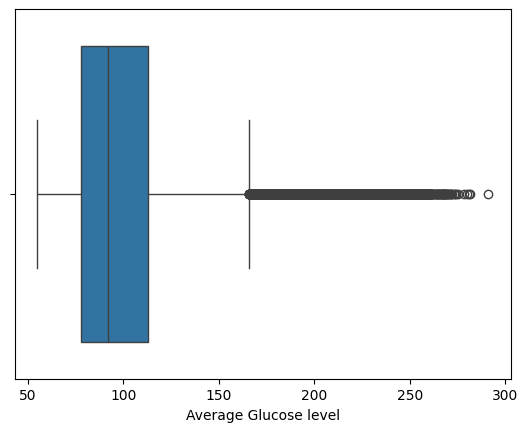

In [18]:
# outlier in Glucose Level

sns.boxplot(x = 'Average Glucose level', data = df_cleaned)

In [19]:
# remove glucose level greater than 260

df_cleaned = df_cleaned[df_cleaned['Average Glucose level'] < 261]
df_cleaned['Average Glucose level'].describe()

count    40458.000000
mean       105.143115
std         43.727280
min         55.010000
25%         77.590000
50%         91.785000
75%        112.747500
max        260.910000
Name: Average Glucose level, dtype: float64

In [20]:
df_cleaned.isna().sum()

Gender                   0
Age                      0
Hypertension             0
Heart Disease            0
Married                  0
Occupation               0
Residence                0
Average Glucose level    0
BMI                      0
Smoking                  0
Brain Stroke             0
Age Group                0
dtype: int64